## I. Ask & Prepare Phase


This project serves as the capstone for the **Google Data Analytics Professional** Certificate course. I chose the Own Path category to cement the skills I learned from the program.

This project aims to analyze various factors **that influence a company’s employee turnover** using our Employee Churn dataset. The dataset used in this project was taken from [Elite Data Science’s](https://elitedatascience.com/) Cornerstone #4 Project: Chief People Officer.

With the data provided, I will attempt to understand the various factors **why employees leave.** At the end of the analysis, **I will make recommendations that will hopefully influence this company's practices to promote a better workplace for all.** Hopefully, this increases employee satisfaction and retention.



## II. Process Phase

To get started, we will first **download the necessary packages, load our data and assign it to a variable so we can easily reference it.**

In [1]:
# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Assign dataset to a variable
df = pd.read_csv('employee_churn.csv')

We then inspect the first rows of the data using the **head()** function so we could have a glimpse of what variables we’ll work with.



In [3]:
# Print first 5 rows of dataset
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


Then we'll use **shape()** to see how many rows and columns this dataset has.

In [4]:
# Get number of rows and columns of dataset
df.shape

(14249, 10)

Next, we will now inspect our data to **understand what it contains** and to make sure **it’s formatted for analysis.**

In [5]:
# Check For Data Types In Our Data Frame
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [6]:
# Check Dataset If There Are Null Values
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

We now use the **unique()** function to see the categorical data we’re working with. In this part, we will also see if there are duplicate values and if we should retain or remove them.



In [7]:
# Check unique values indicated in department variable
print(df['department'].unique())

['engineering' 'support' 'sales' 'IT' 'product' 'marketing' 'temp'
 'procurement' 'finance' nan 'management' 'information_technology' 'admin']


The IT deparment seems to have a duplicate as there is an entry for **IT** and **information_technology.**

There is also a **temp** entry which is for temporary employees. 

In [8]:
# Check unique values indicated in salary variable
print(df['salary'].unique())

['low' 'medium' 'high']


In [9]:
# Check unique values indicated in status variable
print(df['status'].unique())

['Left' 'Employed']


Next, we will now **clean our data to make sure it is formatted** for analysis

In [10]:
# Replace Null values with 0
df.filed_complaint.fillna(0, inplace=True)
df.recently_promoted.fillna(0, inplace=True)

In [11]:
# Replace all instances of the 'information_technology' class with 'IT' instead
df.department.replace('information_technology', 'IT', inplace=True)

In [12]:
# Since we are looking into predicting possible churning, remove temporary employees
df = df[df.department != 'temp']

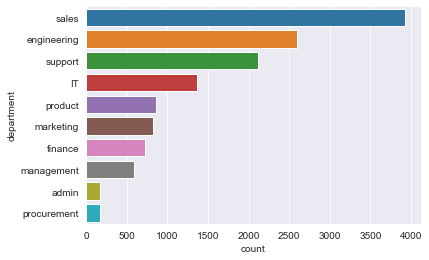

In [13]:
# Visualize department column to check changes from data cleaning
sns.countplot(y='department', data=df, order = df['department'].value_counts().index)
plt.show()

In [14]:
# Flag 'last_evaluation' column with missing values
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

# Then fill original missing values with 0
df.last_evaluation.fillna(0, inplace=True)

In [15]:
# Flag 'department' with with missing values
df['department_missing'] = df.department.isnull().astype(int)

# Then fill original missing values with 0
df.department.fillna(0, inplace=True)

The **is.null()** function is used again to check if our data still has null values.



In [16]:
# Display the number of missing values for each feature (both categorical and numeric) 
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
department_missing         0
dtype: int64

## III. Analyze Phase
We will now visualize our processed data to see if there are any interesting trends we can find.

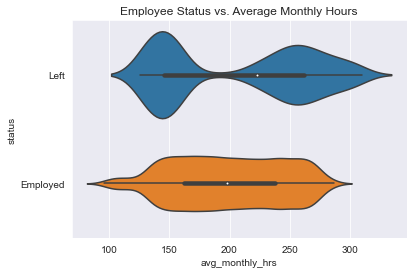

In [17]:
sns.violinplot(y='status', x='avg_monthly_hrs', data=df).set(title='Employee Status vs. Average Monthly Hours')
plt.show()

This **violin plot** shows the **average monthly hours** worked by employees who **left** or are **still employed** by the company. It’s interesting to note that majority of employees who left work 150 hours per month which averages 6.8 hours per day. The employees who are still employed have a distributed amount of variability in their monthly working hours. 

**There doesn’t seem to be a clear pattern on the amount of hours worked vs employee status.**

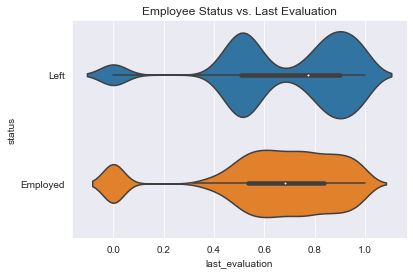

In [18]:
sns.violinplot(y='status', x='last_evaluation', data=df).set(title='Employee Status vs. Last Evaluation')
plt.show()

The **last_evaluation** column is now compared to the **status** column. Evaluation is rated on a 0 to 1 basis **wherein the closer one's evaluation score is to 1, the higher the employee is rated.** 

Based on the plot, **it’s alarming how majority of employees who left have evaluations that range from 0.75 to 1.00. This signals that a lot of top performers are leaving the company.**

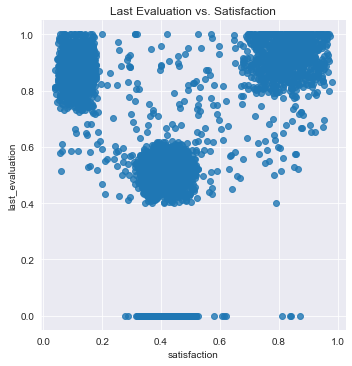

In [19]:
# Visuallize 'last_evaluation' with 'satisfaction' variable 
sns.lmplot(y='last_evaluation', x='satisfaction', data=df[df.status == 'Left'], fit_reg=False).set(title='Last Evaluation vs. Satisfaction')
plt.show()

Based on the plot, **there are 3 clusters of people who left.**

1. First, we have people with high `last_evaluation` but low `satisfaction`. Maybe these people were **overqualified, frustrated, or unhappy** in some other way.

2. Next, we have people with low `last_evaluation` and medium `satisfaction`. These were probably **underperformers or poor cultural fits.**

3. Finally, we have people with high `last_evaluation` and high `satisfaction`. Perhaps these were **overachievers who found better offers elsewhere.**

## IV. Share and Act Phase

1. We recommend to **increase employee engagement according to performance evaluations.** By this, we need to ensure that employees are given avenues to work on projects that interest them.

* This is expected to keep employees with `high last_evaluation but low satisfaction` engaged. 

* Also, this might help employees `low last_evaluation and medium satisfaction` to increase their motivation. That way, we can potentially help these employees from leaving the company.


2. Another avenue we can look at in the future is **compensation levels.** In case we'll pursue this route, **we'll investigate if there's a correlation between salary levels vs. people who left the company.** As of now, the `salary` column is only labeled with three entries (low, medium and high). 

* This doesn't give us an exact range of how much people are earning so it's difficult to determine if salary levels influence employee churn at this given moment. 